# IBM Applied Data Science Capstone

## Accident Severity Prediction 

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Reducing the number of collisions has become one of the important public safety challenges around the world. Millions of humans lives are lost each year due to car crashes. Prediction of the severity and understanding the key factor that contribute to these car accidents becomes vital for many governments across the world. Thus, it enables in creation of optimized traffic systems, safer routes and better transport infrastructure. Hence, the significance of developing a severity prediction model
We will use the data science tools to predict the severity of the accidents to understand the various patterns and factors that affect the accident severity.

## Data <a name="data"></a>

The accident data used for the project is of the dataset provided in Kaggle [here](https://www.kaggle.com/sobhanmoosavi/us-accidents), which comprises of information regarding the collisions from the year 2016 and collected from multiple data sources. It also captures various information about the weather condition, location of the incident, etc. Details on the dataset is given [here](https://smoosavi.org/datasets/us_accidents).

In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading and Viewing the Data
data = pd.read_csv("US_Accidents_June20.csv")
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


Now lets understand the data more by checking the available columns, its datatype

In [3]:
# Checking the data
data.shape

(3513617, 49)

In [4]:
# Checking the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [5]:
data.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


Checking if there is any null values in any of the columns.

In [6]:
# Checking if there is any null values in columns
data.isnull().any()

ID                       False
Source                   False
TMC                       True
Severity                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Start_Lng                False
End_Lat                   True
End_Lng                   True
Distance(mi)             False
Description               True
Number                    True
Street                   False
Side                     False
City                      True
County                   False
State                    False
Zipcode                   True
Country                  False
Timezone                  True
Airport_Code              True
Weather_Timestamp         True
Temperature(F)            True
Wind_Chill(F)             True
Humidity(%)               True
Pressure(in)              True
Visibility(mi)            True
Wind_Direction            True
Wind_Speed(mph)           True
Precipitation(in)         True
Weather_Condition         True
Amenity 

In [3]:
# Replacing null values
mean_temp= data['Temperature(F)'].mean()
mean_press= data['Pressure(in)'].mean()
data['Temperature(F)'].fillna(mean_temp,inplace=True)
data['Pressure(in)'].fillna(mean_press,inplace=True)
data.fillna({'Humidity(%)':0,'Wind_Chill(F)':0,'Visibility(mi)':0,'Wind_Direction':0,'Wind_Speed(mph)':0,'Precipitation(in)':0},inplace=True)

## Methodology <a name="methodology"></a>

In this project, we will try to predict the severity of accidents based on the weather conditions present.

In the **first step**, we have collected the data of all accidents from 2016. We have also prepared the data for analysis

**Second step** will be the exploration of the data to understand the distribution of data and see if the data shows any patterns like daywise distribution of accidents etc.

For the **third step**, we will focus on creating a model for classification of severity of these accidents using the variables selected and understading the accuracy of our model

## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data

### Exploratory Data Analysis

Lets see the distribution of the data statewise 

In [8]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

In [9]:
conda install -c conda-forge folium

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [10]:
import folium
data['Count'] = 1

In [11]:
d = data.groupby(['State'])['Count'].sum().reset_index()
n = folium.Map(location=[39.381266, -97.922211],zoom_start=4, tiles='Stamen Toner')
folium.Choropleth(
 geo_data=state_geo,
 data=d,
 columns=['State', 'Count'],
 key_on='feature.id',
 fill_color='YlOrRd',
 fill_opacity=0.7,
 line_opacity=0.2,
    m_start=3,
 legend_name='Accidents' 
).add_to(n)
n

State-wise distribution of accidents show that some states are showing higher accidents. Let us explore this further

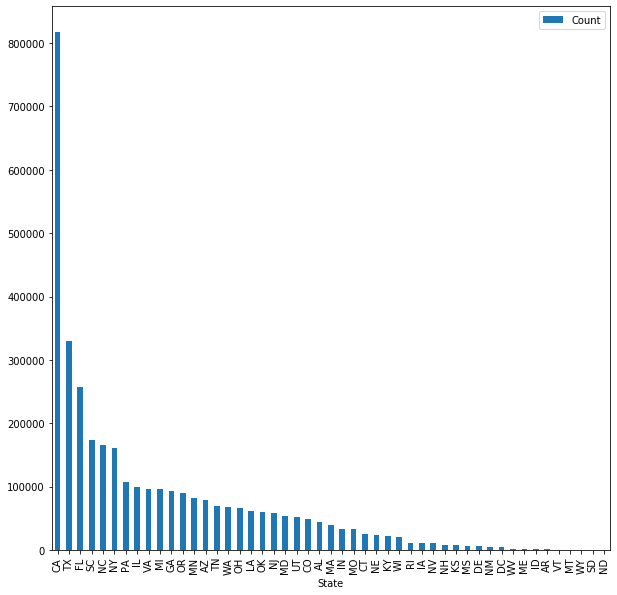

In [12]:
d.set_index('State',inplace=True)
d.sort_values(['Count'],ascending=[0],inplace=True)
d.plot(kind='bar',figsize=(10,10))


We see that the states like CA,TX,FL,SC,NC, NY show very high rates of accidents

Lets see if this pattern has to do with the visibility 

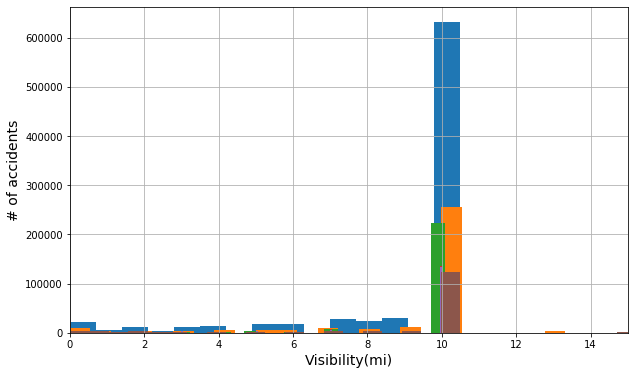

In [13]:
bins=200
plt.figure(figsize=(10, 6))


for st in ['CA', 'TX', 'FL', 'SC', 'NC', 'NY']:
    stfilt = (data['State'] == st)
    plt.hist(data.loc[stfilt,'Visibility(mi)'], bins, density=False)

plt.xlabel('Visibility(mi)', fontsize=14)
plt.ylabel('# of accidents', fontsize=14)
plt.xlim(0,15)
plt.grid()
plt.show()



From the data, we see that visibility does not affect

We can see if the weather conditions shows any pattern

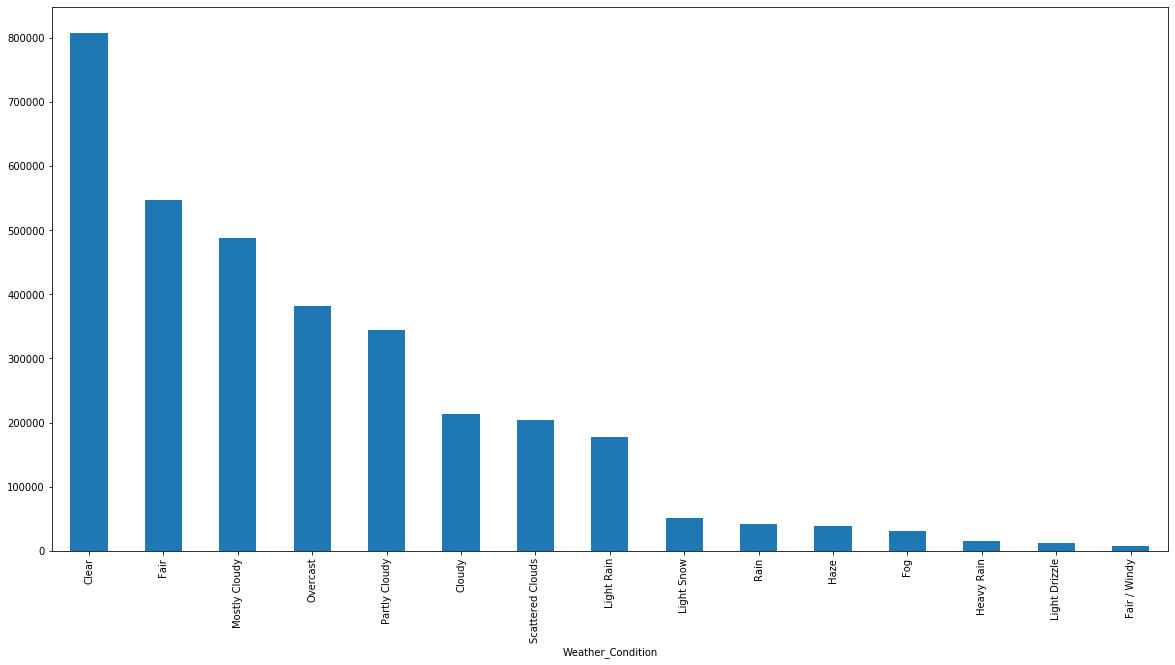

In [14]:
d1 = data.groupby(['Weather_Condition'])['Count'].sum()
d1.sort_values(ascending=False,inplace=True)
d1.head(15).plot(kind='bar',figsize=(20,10))

Weather condition doesnot show any specific pattern influencing

In [15]:
from datetime import datetime

data['year'] = pd.DatetimeIndex(data['Start_Time']).year
data['month'] = pd.DatetimeIndex(data['Start_Time']).month
data['hour'] = pd.DatetimeIndex(data['Start_Time']).hour
data[['year','month','hour']]

,year,month,hour
0,2016,2,5
1,2016,2,6
2,2016,2,6
3,2016,2,7
4,2016,2,7
...,...,...,...
3513612,2019,8,18
3513613,2019,8,19
3513614,2019,8,19
3513615,2019,8,19


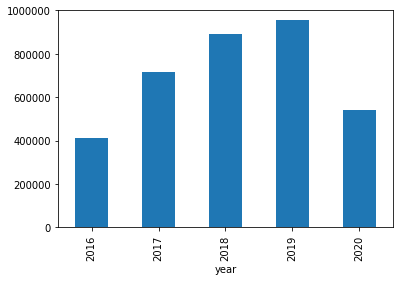

In [16]:
d2= data.groupby(['year'])['Count'].sum()
d2.plot(kind='bar')

Text(0.5, 1.0, 'Accidents per month')

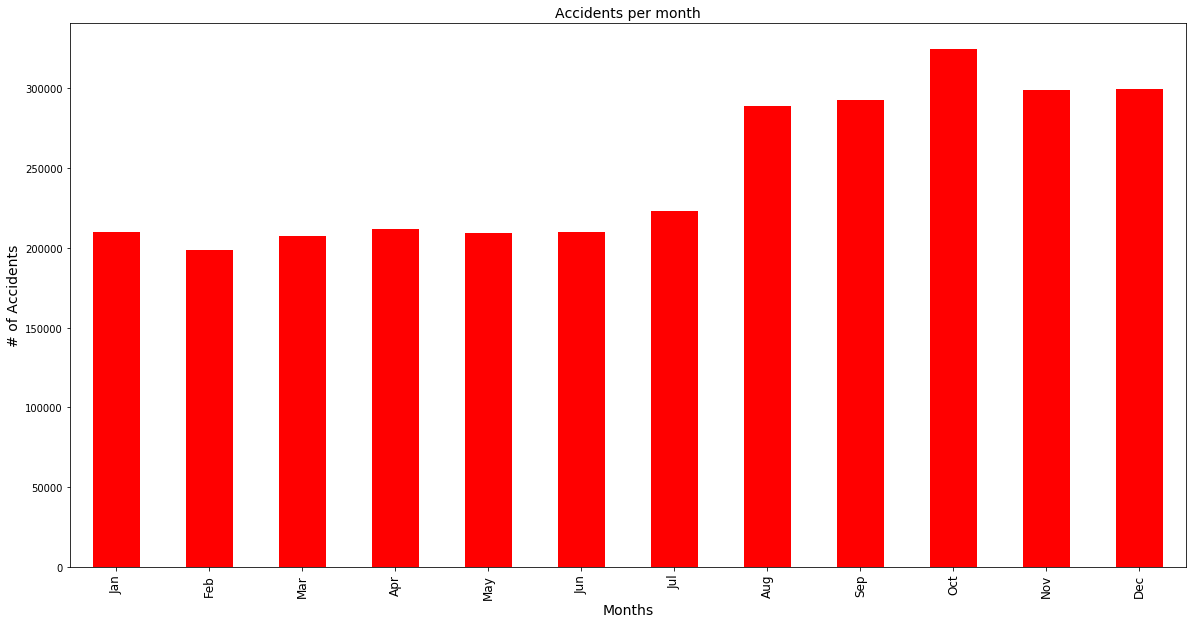

In [17]:
d3= data[data['year'].isin(['2016','2017','2018','2019'])].groupby(['month'])['Count'].sum()
d3
ax= d3.plot(kind='bar',figsize=(20,10),color='r')
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],fontsize='12')
ax.set_xlabel("Months",fontsize='14')
ax.set_ylabel("# of Accidents",fontsize='14')
ax.set_title('Accidents per month',fontsize='14')

Text(0.5, 1.0, 'Accidents hourly distribution')

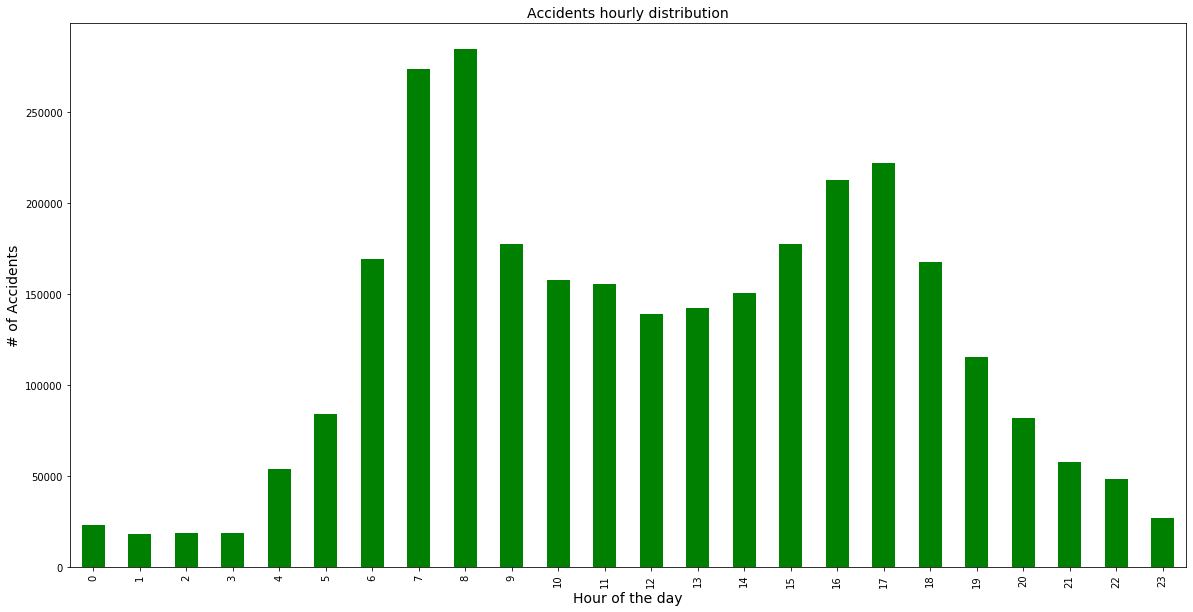

In [18]:
d3= data[data['year'].isin(['2016','2017','2018','2019'])].groupby(['hour'])['Count'].sum()
d3
ax= d3.plot(kind='bar',figsize=(20,10),color='g')

ax.set_xlabel("Hour of the day",fontsize='14')
ax.set_ylabel("# of Accidents",fontsize='14')
ax.set_title('Accidents hourly distribution',fontsize='14')

In [19]:
def day_check(date_time):
    from datetime import datetime
    import calendar
    try:
        if type(date_time) is str:
            date=date_time.split(' ')[0]
            my_date = datetime.strptime(date, "%Y-%m-%d")
            return my_date.weekday()
        else:
            raise Exception("'date_time' not a string")

    except Exception as e:
        print(e)
# use above function to find which weekday 
nth_day=[]
date_time=[dt for dt in data['Start_Time']]
for i in range(len(date_time)):
    nth_day.append(day_check(date_time[i]))
    
data['weekday']=nth_day
wday_data = (data['weekday'].isin([0, 1, 2, 3, 4]))
weekend_data = (data['weekday'].isin([5, 6]))
df_wday = (data.loc[wday_data])[['hour']]
df_weekend = (data.loc[weekend_data])[['hour']]

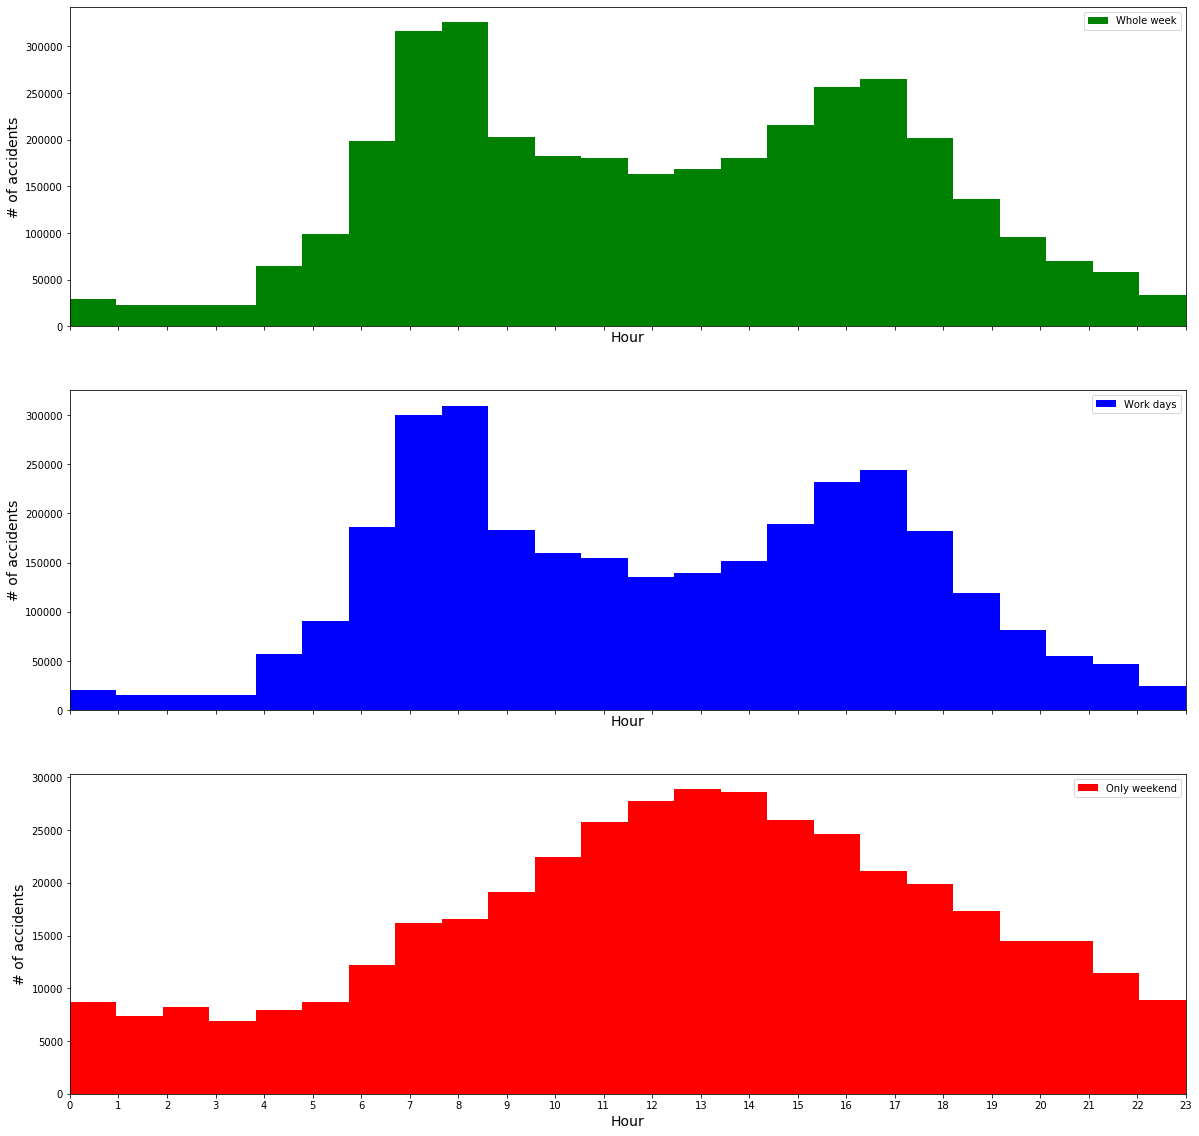

In [20]:
# plot the distribution of accidents during the day
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20), sharex=True)
ax0, ax1, ax2 = axes.flatten()
bins=24
# ax0
ax0.hist(list(data['hour']),  bins=24, density=False, histtype='stepfilled', linewidth=3, color='g', label='Whole week')
ax0.set_ylabel('# of accidents', fontsize=14)
ax0.set_xlabel('Hour', fontsize=14)
# ax1
ax1.hist(list(df_wday['hour']), bins=24, density=False, histtype='stepfilled', linewidth=3, color='b', label='Work days')
ax1.set_ylabel('# of accidents', fontsize=14)
ax1.set_xlabel('Hour', fontsize=14)
# ax2
ax2.hist(list(df_weekend['hour']), bins=24, density=False, histtype='stepfilled', linewidth=3, color='r', label='Only weekend')
ax2.set_ylabel('# of accidents', fontsize=14)
ax2.set_xlabel('Hour', fontsize=14)
ax0.legend(); ax1.legend(); ax2.legend()
plt.xticks(range(24))
plt.xlim(0, 23)
plt.show()



[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tue'),
 Text(0, 0, 'Wed'),
 Text(0, 0, 'Thu'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sat'),
 Text(0, 0, 'Sun')]

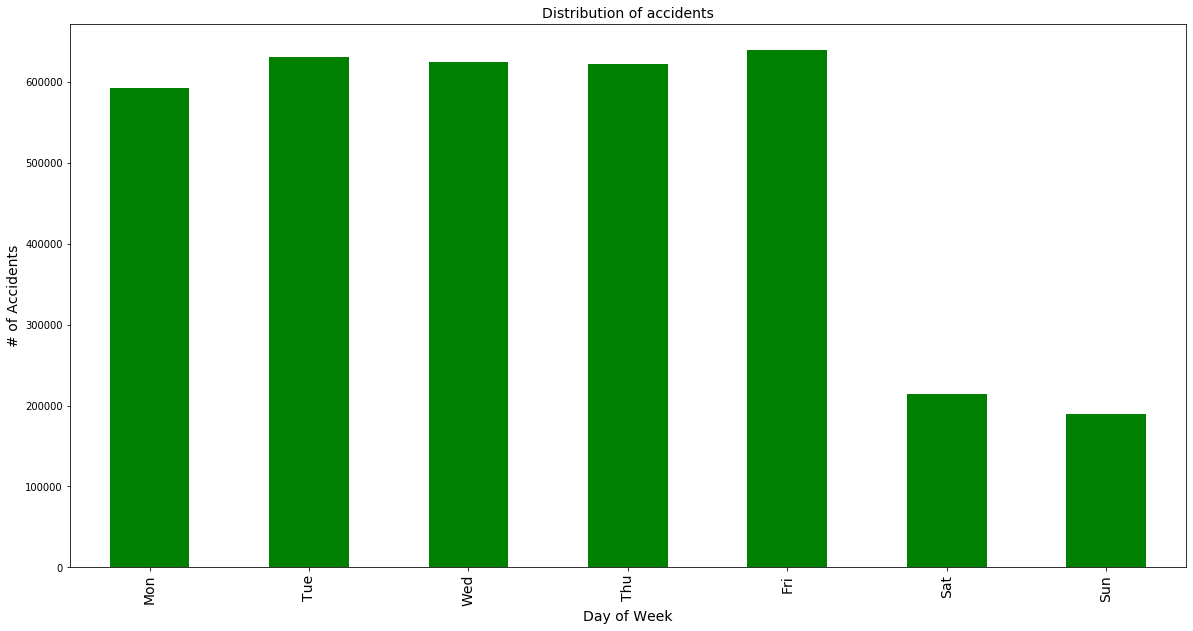

In [21]:
d4= data.groupby(['weekday'])['Count'].sum()
ax =d4.plot(kind='bar',figsize=(20,10),color='g')
ax.set_xlabel('Day of Week',fontsize=14)
ax.set_ylabel('# of Accidents',fontsize=14)
ax.set_title('Distribution of accidents',fontsize=14)
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],fontsize=14)

Text(0.5, 1.0, 'Accident Distribution')

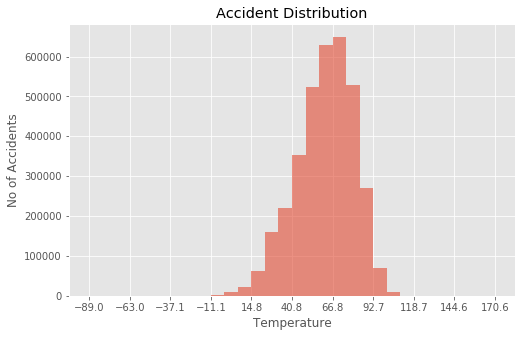

In [22]:
import matplotlib as mlt
mlt.style.use('ggplot')
count,bin_edges= np.histogram(data['Temperature(F)'])
data['Temperature(F)'].plot(kind='hist',figsize=(8, 5),bins=30, xticks=bin_edges,alpha=0.6)
plt.xlabel('Temperature')
plt.ylabel('No of Accidents')
plt.title('Accident Distribution')

Text(0.5, 1.0, 'Accident Distribution')

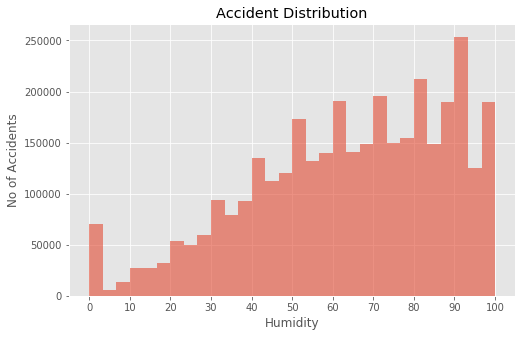

In [23]:
count,bin_edges= np.histogram(data['Humidity(%)'])
data['Humidity(%)'].plot(kind='hist',figsize=(8, 5),bins=30, xticks=bin_edges,alpha=0.6)
plt.xlabel('Humidity')
plt.ylabel('No of Accidents')
plt.title('Accident Distribution')

### Model Generation

Let us start creating the model to predict the severity of these accidents. For the classification model, lets start with seperating the columns. 

#### Data Selection

In [4]:
data_1= data[['Humidity(%)','Wind_Chill(F)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Severity','Temperature(F)','Pressure(in)']]
data_1.head()

,Humidity(%),Wind_Chill(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Severity,Temperature(F),Pressure(in)
0,91.0,0.0,10.0,0.0,0.02,3,36.9,29.68
1,100.0,0.0,10.0,0.0,0.00,2,37.9,29.65
2,100.0,33.3,10.0,3.5,0.00,2,36.0,29.67
3,96.0,31.0,9.0,4.6,0.00,3,35.1,29.64
4,89.0,33.3,6.0,3.5,0.00,2,36.0,29.65


Selecting the independent variables

In [5]:
# Selecting the independent variables
X= np.asarray(data[['Humidity(%)','Wind_Chill(F)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Temperature(F)','Pressure(in)']])

In [6]:
# Seperating the classification variable/dependent variable
Y=np.asarray(data_1['Severity'])

Scaling the data for further analysis

In [7]:
# Scaling the independent variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1=scaler.fit_transform(X)

Splitting the dataset into training and testing data 

In [8]:
# Splitting dataset into training and testing data
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X1,Y,test_size=0.5,random_state= False)

#### Logistic Regression

Lets start with creating a logistic regression model for the analysis.

In [14]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(C=0.01, solver='liblinear',max_iter=1000)

In [15]:
lr.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
lr.score(x_train,y_train)

0.6752240426956161

In [17]:
yhat=lr.predict(x_test)
yhat_prob= lr.predict_proba(x_test)

In [18]:
# Evaluating the logistic model using jaccard index, log_loss
from sklearn.metrics import jaccard_similarity_score,accuracy_score,log_loss

In [19]:
jaccard_similarity_score(y_test,yhat)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6755742940752238

In [20]:
accuracy_score(y_test,yhat)

0.6755742940752238

In [21]:
log_loss(y_test,yhat_prob)

0.7603603252166787

#### Decision Tree Classification

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree= DecisionTreeClassifier(criterion='entropy',max_depth=6)

In [24]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
yhat2= tree.predict(x_test)

In [26]:
jaccard_similarity_score(y_test,yhat2)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6757598577876138

In [27]:
accuracy_score(y_test,yhat2)

0.6757598577876138

#### K Nearest Neighbor Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
neigh1= KNeighborsClassifier(n_neighbors=7)

In [12]:
neigh1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
yhat3= neigh1.predict(x_test)
accuracy_score(y_test,yhat3)

In [ ]:
jaccard_similarity_score(y_test,yhat3)

## Conclusion <a name="conclusion"></a>

In this study, I have analysed the distribution of the accident data and various factors that influence the accidents. These were then used to predict the severity of the accident. I have used the classification models using Logistic Regression and  Decision Tree Classifier for the classification. The models was obtaining  ~68% accuracy and there is still scope for improvement. With more data on these accidents, the model could be trained to improve its accuracy and help organization in creating better transport infrastructure.